In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\Lovekesh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
dataset = pd.read_csv('placement.csv')
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


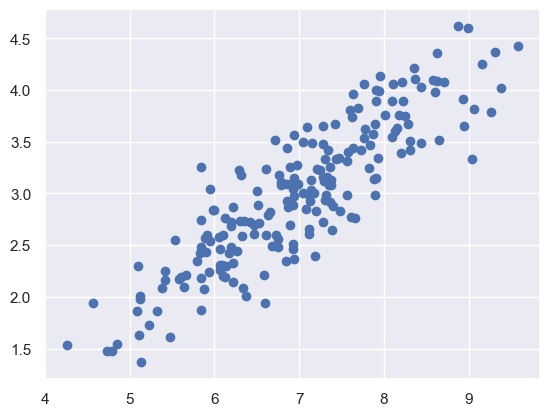

In [4]:
# find data is linear or not. straight line sperate the data with less error.
plt.scatter(dataset['cgpa'], dataset['package'])

In [5]:
#split the data into independent variable and dependent variable
x = dataset.iloc[:,0:1]
y = dataset.iloc[:,-1]

In [6]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [7]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [8]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

<Axes: ylabel='cgpa'>

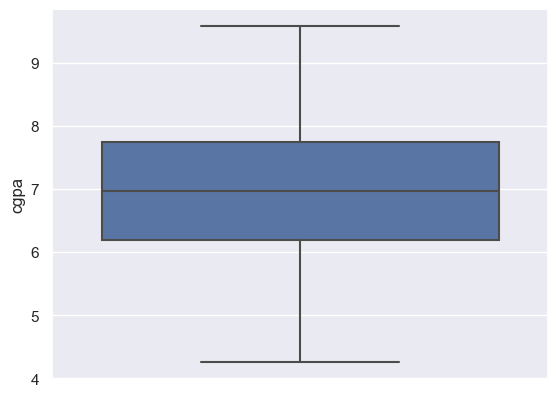

In [26]:
sns.boxplot(y = 'cgpa', data = dataset)

In [25]:
# split the data into training and test
# training is for building the model
# test data is for evaluation with predicted data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [26]:
x_train

,cgpa
16,6.84
186,7.84
144,6.17
121,6.50
80,7.63
...,...
63,9.16
70,5.79
81,6.10
11,6.61


In [27]:
x_test

,cgpa
37,5.90
109,7.77
31,8.10
89,6.42
66,5.11
119,7.39
54,6.86
74,6.85
145,5.84
142,6.93


In [28]:
x_train.shape

(160, 1)

In [29]:
x_test.shape

(40, 1)

## Build Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linearmodel = LinearRegression()
linearmodel.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = linearmodel.predict(x_test)

In [33]:
y_pred

array([2.36345297, 3.42708176, 3.61478096, 2.6592214 , 1.91411246,
       3.21094329, 2.909487  , 2.90379914, 2.32932584, 2.94930198,
       3.31332467, 3.88779797, 3.17112831, 3.6716595 , 2.85260845,
       3.71716234, 3.14837689, 3.18250402, 2.54546431, 3.23369471,
       2.94930198, 3.52377529, 3.01186838, 2.12456308, 3.33038823,
       4.45658343, 2.39189224, 3.15406474, 3.06874692, 3.45552103,
       4.09256074, 2.44877078, 3.05168336, 2.49996147, 2.92655056,
       2.96636554, 3.17681616, 2.35776511, 2.39189224, 2.52840075])

In [35]:
y_test

37     2.43
109    4.06
31     3.89
89     2.72
66     1.63
119    2.65
54     3.09
74     3.44
145    2.18
142    3.04
148    3.40
112    4.10
174    2.99
55     3.39
141    3.18
149    3.67
25     3.65
34     3.42
170    2.87
39     3.33
172    2.51
153    3.99
175    3.50
61     1.61
65     3.81
50     4.43
42     2.54
129    3.12
179    3.03
2      3.25
12     3.65
133    2.58
90     2.66
22     2.30
41     2.70
32     3.08
125    3.16
196    2.57
158    3.04
180    2.72
Name: package, dtype: float64

In [36]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, y_pred)

0.7368288711522916

Text(0, 0.5, 'Package (in lpa)')

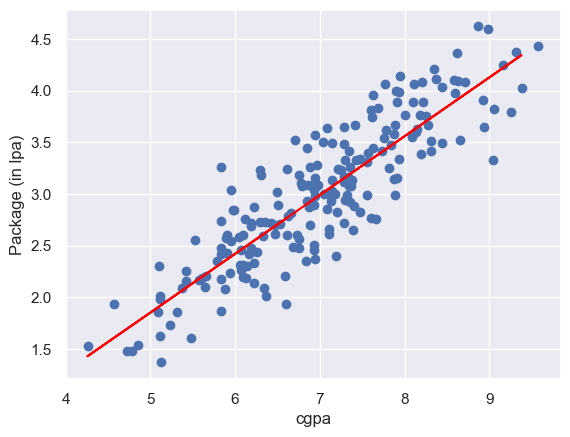

In [39]:
plt.scatter(dataset['cgpa'], dataset['package'])
plt.plot(x_train, linearmodel.predict(x_train), color='red')
plt.xlabel('cgpa')
plt.ylabel('Package (in lpa)')

In [40]:
# y = mx + c
# m = slope
# c = intercept
m = linearmodel.coef_
print(m)
c = linearmodel.intercept_
print(c)

[0.56878545]
-0.9923811968374028


In [56]:
# salary of 8.55 cgpa
salary = m*8.55+c
salary

array([3.87073441])

In [57]:
# cgpa = 7.23
# salary = ?
package = m*7.23 + c
package

array([3.11993762])

# Build own model

In [58]:
class ownmodel:
    def _init_(self):
        self.m = None
        self.c = None
    def fit(self, x_train, y_train):
        num = 0
        den = 0
        
        for i in range(x_train.shape[0]):
            num = num + ((x_train[i] - x_train.mean()) * (y_train[i] - y_train.mean()))
            den = den + ((x_train[i] - x_train.mean()) * (x_train[i] - x_train.mean()))
        self.m = num/den
        self.c = y_train.mean() - (self.m * x_train.mean())
        print(self.m)
        print(self.c)
        
    def predict(self, x_test):
        print(x_test)
        return self.m * x_test + self.c

In [59]:
df1 = pd.read_csv('placement.csv')
df1

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [63]:
x = df1.iloc[:,0:1].values
y = df1.iloc[:,-1].values

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [65]:
lr = ownmodel()
lr.fit(x_train,y_train)

[0.57633042]
[-1.02960704]
